# 1. Ambiente

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
import yfinance as yf

In [6]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [7]:
from datetime import date, timedelta

In [8]:
import requests

#2. Obtencion de datos

In [9]:
global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
df_bitcoin = None
precio_actual = 0
tendencia = ""
media_bitcoin= 0.0
algoritmo_decision = ""

In [10]:
#Utiliza la biblioteca yfinance de Python para extraer el histórico de precios del Bitcoin en dólares BTC-USD, deberás extraer el histórico de los últimos 7 días en intervalos de 5 minutos, este histórico deberás guardarlo en el dataframe df_bitcoin.

In [63]:
def importar_base_bitcoin():
 global df_bitcoin
 url1 = 'https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD'
 ua = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'
 r = requests.get(url1, headers={'User-Agent': ua})
 indices = pd.read_html(r.text)[0]
 bitcoin = yf.Ticker('BTC-USD')
 df_bitcoin = bitcoin.history(period='7d', interval='5m')
print(df_bitcoin)

                                   Open          High           Low  \
Datetime                                                              
2023-10-28 00:00:00+00:00  33907.722656  33908.394531  33901.078125   
2023-10-28 00:05:00+00:00  33908.644531  33914.089844  33908.644531   
2023-10-28 00:10:00+00:00  33912.328125  33913.753906  33905.414062   
2023-10-28 00:15:00+00:00  33898.480469  33898.480469  33885.460938   
2023-10-28 00:20:00+00:00  33875.285156  33886.210938  33875.285156   
...                                 ...           ...           ...   
2023-11-03 20:45:00+00:00  34629.367188  34670.417969  34629.367188   
2023-11-03 20:50:00+00:00  34664.781250  34670.753906  34649.964844   
2023-11-03 20:55:00+00:00  34650.402344  34659.535156  34613.441406   
2023-11-03 21:00:00+00:00  34614.550781  34652.687500  34614.550781   
2023-11-03 21:05:00+00:00  34649.890625  34672.121094  34649.890625   

                                  Close   Volume  Dividends  Stock Splits  


In [15]:
#Web scraping para obtener el precio actual y extraer tendencias

In [69]:
import requests
res =requests.get('https://coinmarketcap.com/')
s=BeautifulSoup(res.content, features= 'lxml')

In [93]:
def extraer_tendencias():
  import requests
res =requests.get('https://coinmarketcap.com/')
global_bitcoin = pd.read_html(res.content)
s=BeautifulSoup(res.content, features= 'lxml')
resp= s.find('div', {'class':[ 'sc-a0353bbc-0 gDrtaY', 'sc-a0353bbc-0 gDrtaY rise', 'sc-a0353bbc-0 gDrtaY fall']}).get_text()
precio_actual= float((resp).replace('$','').replace(',',''))
precio_actual
tendencia = s.find('span', {'class': 'sc-d55c02b-0 iwBxy','class': 'sc-d55c02b-0 gUnzUB'})
clases= tendencia.span['class']
if tendencia =='class'[0]:
 tendencia = 'alta'
else:
 tendencia='baja'
print('Bitcoin Price: ', precio_actual)
print('Tendencia: ', tendencia)


Bitcoin Price:  34701.31
Tendencia:  baja


#3. Limpieza de datos

In [96]:
df_bitcoin_limpio = df_bitcoin

                                   Open          High           Low  \
Datetime                                                              
2023-10-28 00:00:00+00:00  33907.722656  33908.394531  33901.078125   
2023-10-28 00:05:00+00:00  33908.644531  33914.089844  33908.644531   
2023-10-28 00:10:00+00:00  33912.328125  33913.753906  33905.414062   
2023-10-28 00:15:00+00:00  33898.480469  33898.480469  33885.460938   
2023-10-28 00:20:00+00:00  33875.285156  33886.210938  33875.285156   
...                                 ...           ...           ...   
2023-11-03 20:45:00+00:00  34629.367188  34670.417969  34629.367188   
2023-11-03 20:50:00+00:00  34664.781250  34670.753906  34649.964844   
2023-11-03 20:55:00+00:00  34650.402344  34659.535156  34613.441406   
2023-11-03 21:00:00+00:00  34614.550781  34652.687500  34614.550781   
2023-11-03 21:05:00+00:00  34649.890625  34672.121094  34649.890625   

                                  Close   Volume  Dividends  Stock Splits  \

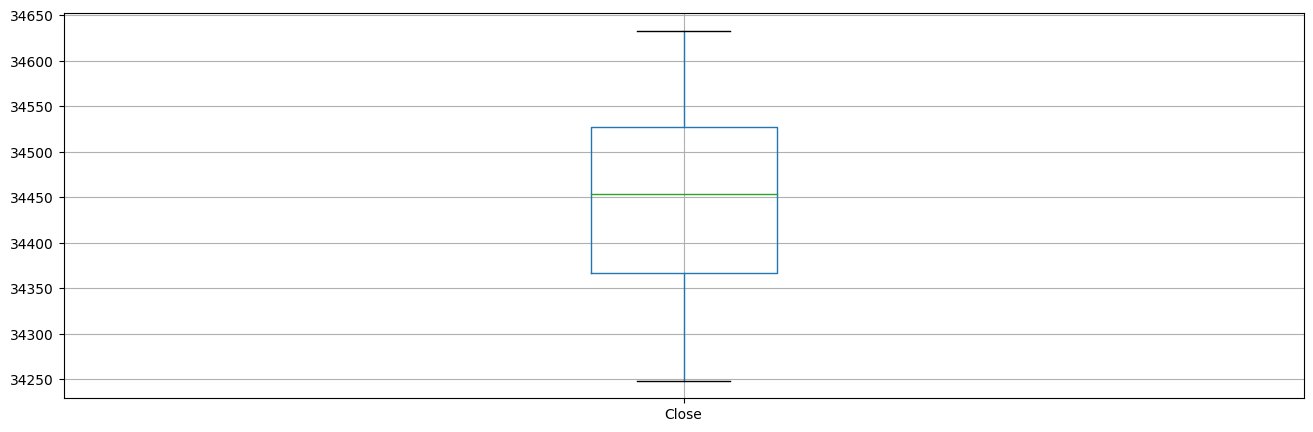

In [137]:
def limpieza_datos():
  df_bitcoin_limpio = df_bitcoin.copy()
  df_bitcoin_limpio [['Close', 'Volume']]
  df_bitcoin_limpio['Datetime'] = df_bitcoin_limpio.index
  df_bitcoin_limpio =df_bitcoin_limpio[['Datetime', 'Close', 'Volume' ]]
  df_bitcoin_limpio = df_bitcoin_limpio.set_index('Datetime')
  df_bitcoin_limpio.drop_duplicates(inplace=True)
  df_bitcoin_limpio[df_bitcoin_limpio['Close'].isnull()]
  df_bitcoin_limpio[df_bitcoin_limpio['Volume'] >= 0]
  df_bitcoin_limpio.boxplot(['Close']) #identificando los outliers
valor = df_bitcoin_limpio['Close']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1- 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
seleccion =  ((valor>= Q1) & (valor<=Q3))
media_bitcoin = df_bitcoin_limpio[seleccion]
media_bitcoin.boxplot(['Close'])

print (df_bitcoin_limpio)

In [98]:
df_bitcoin_limpio.info() #no tengo nulos en mi df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1982 entries, 2023-10-28 00:00:00+00:00 to 2023-11-03 21:05:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1982 non-null   float64
 1   High          1982 non-null   float64
 2   Low           1982 non-null   float64
 3   Close         1982 non-null   float64
 4   Volume        1982 non-null   int64  
 5   Dividends     1982 non-null   float64
 6   Stock Splits  1982 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 123.9 KB


<Axes: >

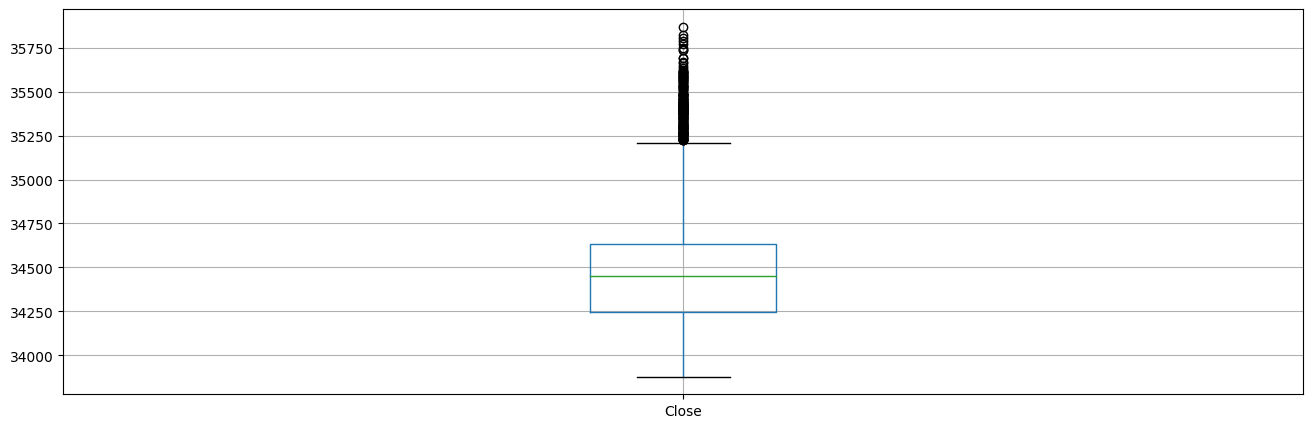

In [99]:
df_bitcoin_limpio.boxplot(['Close']) #identificando los outliers

In [138]:
media_bitcoin =df_bitcoin_limpio['Close'].mean().round(2) #calculo del precio promedio de Close
media_bitcoin

34508.01

#4. Tomar decisiones

In [105]:
def take_decision():
 global  media_bitcoin, precio_actual, algoritmo_decision
 if precio_actual >= media_bitcoin and tendencia == 'alta':
  algoritmo_decision = 'Vender'
 if precio_actual < media_bitcoin and tendencia == 'baja':
  algoritmo_decision = 'Comprar'
 else:
  algoritmo_decision = 'Esperar'
 print('La decision a tomar es:', algoritmo_decision)

In [106]:
take_decision()

La decision a tomar es: Esperar


#5.Visualizacion

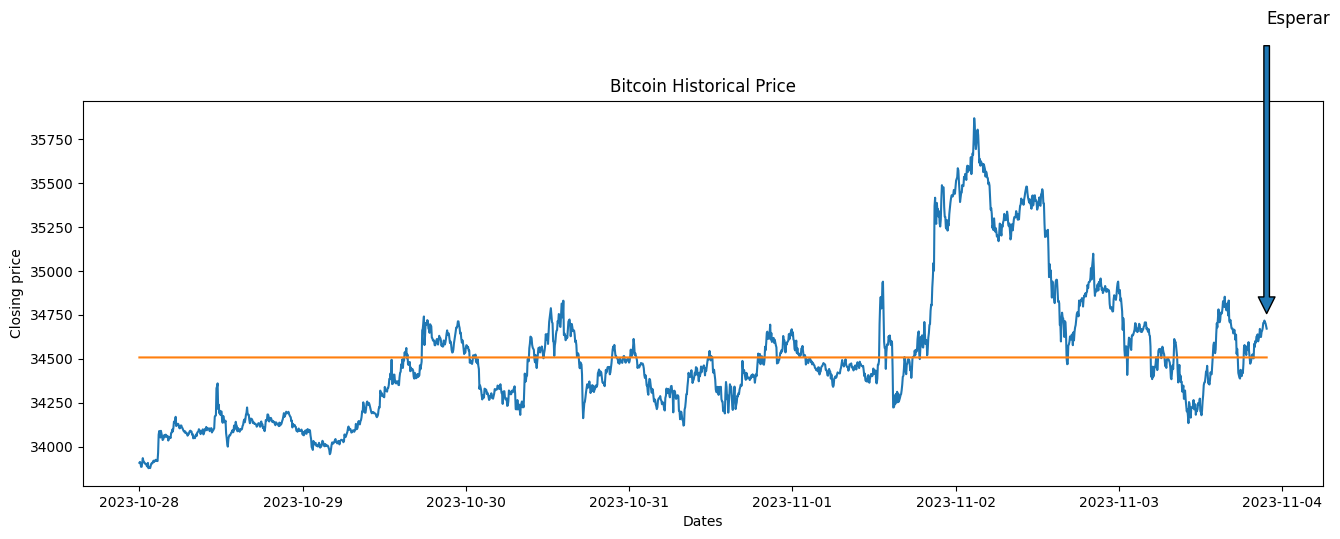

In [130]:
def visualizacion():
 global media_bitcoin, precio_actual, algoritmo_decision, tendencia
 df_bitcoin['Promedio']= media_bitcoin
 area = plt.figure()
 plt.rc('figure', figsize = (16, 5))
 datos_bitcoin = df_bitcoin.Close
 plt.title('Bitcoin Historical Price')
 plt.xlabel('Dates')
 plt.ylabel('Closing price')
 plt.plot(df_bitcoin.index, df_bitcoin['Close'], label= 'Closing Price')
 plt.plot(df_bitcoin.index, df_bitcoin['Promedio'], label= 'Promedio')
 plt.annotate(f'{algoritmo_decision}',
      xy=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]),
      xytext=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1] * 1.05),
      arrowprops=dict(shrink=0.05),
      fontsize=12)

 plt.show()

visualizacion()

# 6. Automatizacion

In [108]:
from IPython.display import clear_output
import time

Bitcoin Price:  34701.31
Tendencia:  baja
La decision a tomar es: Esperar


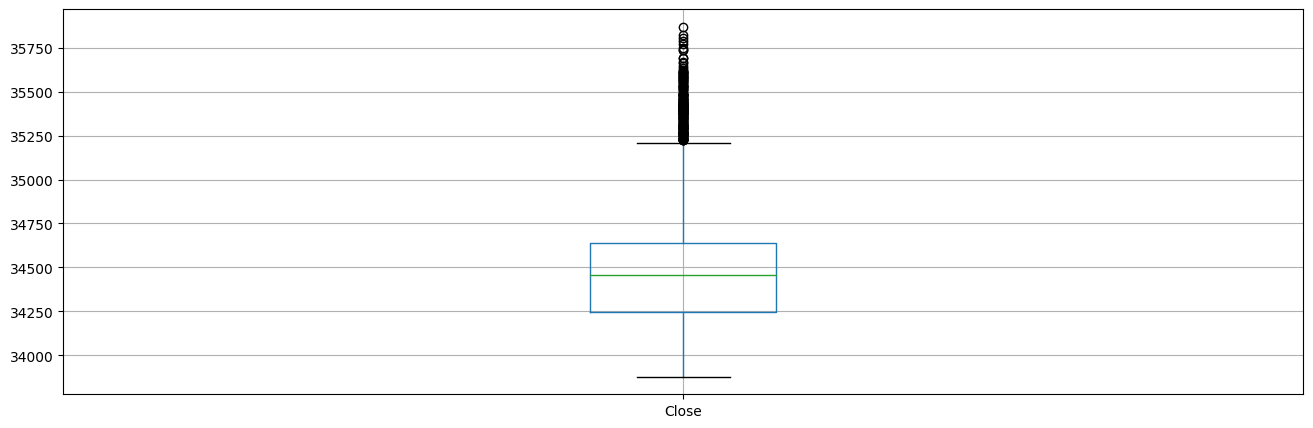

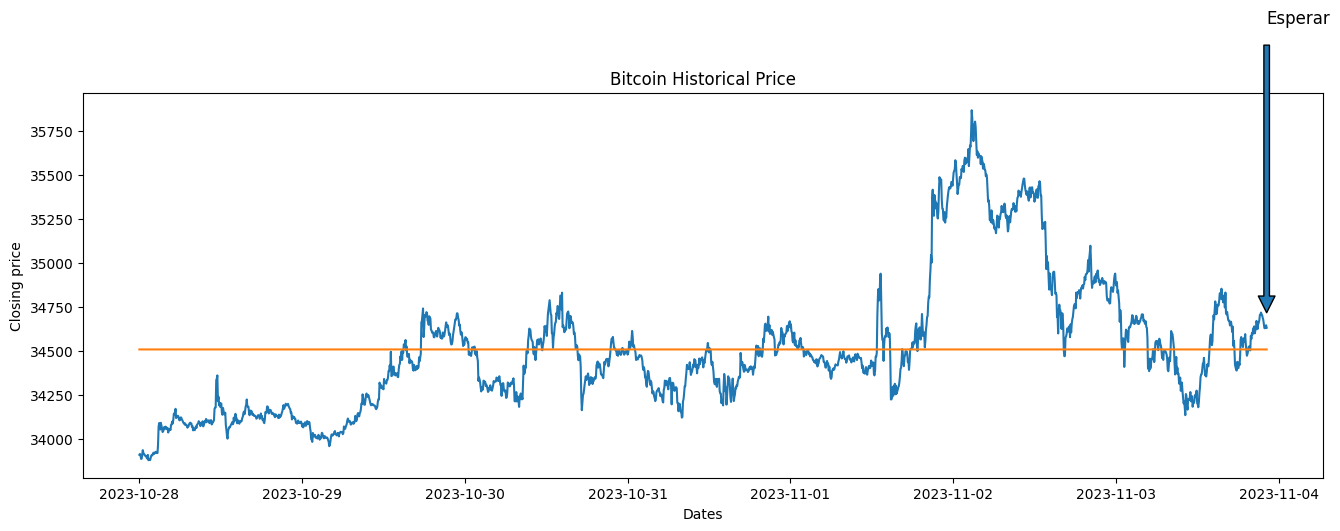

In [ ]:
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  take_decision()
  visualizacion()
  time.sleep(300)